# Plotting Web Based Data

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

#### Question
How does the yearly percentage of winning games in a season of the University of Michigan Wolverines football team compare with the average attendance of home games for the period 2009-2017?

#### Data Sources
- [List of University of Michigan Wolverines Football Seasons](https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_football_seasons)
- [Michigan Attendance Totals, 1927-2017](https://bentley.umich.edu/athdept/stadium/stadtext/mattend.htm)

#### DataFrames

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

def get_ties(x):
    if len(x.split('–')) == 3:
        return int(x.split('–')[1])
    return 0
    
# % Wins
url_seasons = 'https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_football_seasons'
df_seasons = pd.read_html(url_seasons)[0]
df_seasons.columns = df_seasons.iloc[0]
df_seasons = df_seasons.drop(0, axis=0).dropna(0, how='all', thresh=3).set_index('Year')
df_seasons.index = pd.to_datetime(df_seasons.index)
df_seasons['Wins'] = df_seasons['Overall'].apply(lambda x: int(x.split('–')[0]))
df_seasons['Ties'] = df_seasons['Overall'].apply(get_ties)
df_seasons['Losses'] = df_seasons['Overall'].apply(lambda x: int(x[-1]))
df_seasons['Win %'] = df_seasons['Wins'] / (df_seasons['Wins'] + df_seasons['Losses'] + df_seasons['Ties']) * 100
df_wins = df_seasons['Win %']

# Yearly Average Home Game Attendance
url_attend = 'https://bentley.umich.edu/athdept/stadium/stadtext/mattend.htm'
df_attend = pd.read_html(url_attend)[1]
df_attend = df_attend.set_index('Year').dropna(axis=0).sort_index()
df_attend.index = pd.to_datetime(df_attend.index)

# Merge DataFrames
df_plt = df_seasons.join(df_attend)[['Win %', 'Average']].round(1)
df_plt = df_plt[df_plt.index >= pd.to_datetime('2009')].groupby('Year').max().dropna()
df_plt.index = df_plt.index.strftime('%Y')

#### Plot

<IPython.core.display.Javascript object>


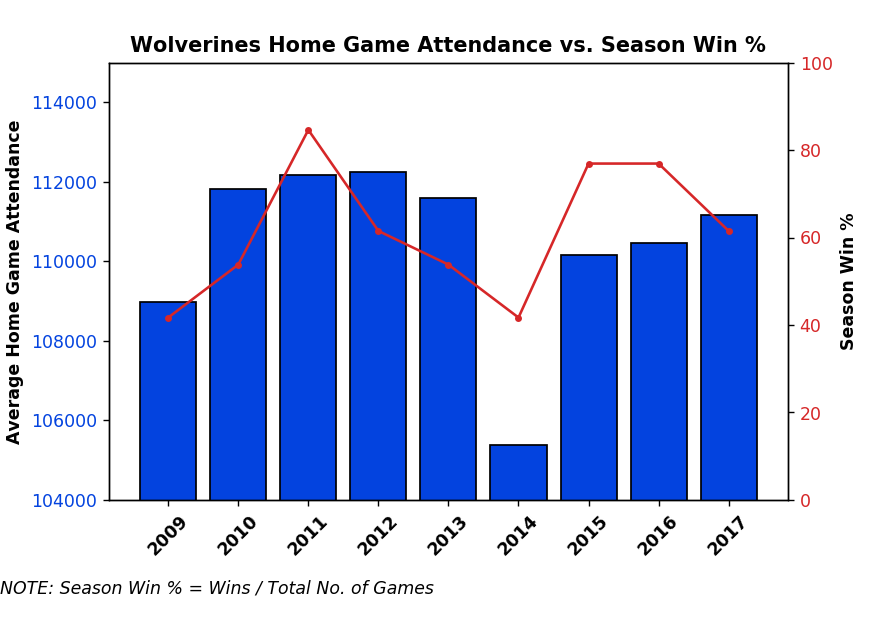

In [10]:
x = df_plt.index.values

fig, ax1= plt.subplots(figsize=(7, 5))

# Bar Chart
clr = 'xkcd:blue'
bars = ax1.bar(x, df_plt['Average'].values, color=clr)
for bar in bars:
    bar.set_edgecolor('black')
ax1.set_ylim(104000, 115000)
ax1.set_xticklabels(x, fontsize=10, weight='bold')
ax1.set_ylabel('Average Home Game Attendance', fontsize=10, weight='bold')  
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
ax1.tick_params(axis='y', labelcolor=clr)

# Line Chart
clr = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(x, df_plt['Win %'].values, '.-', color=clr)
ax2.set_ylim(0, 100)
ax2.set_ylabel('Season Win %', fontsize=10, weight='bold')
ax2.tick_params(axis='y', labelcolor=clr)

plt.subplots_adjust(top=0.9, bottom=0.2)
plt.title('Wolverines Home Game Attendance vs. Season Win %', weight='bold')
plt.annotate('NOTE: Season Win % = Wins / Total No. of Games', (0, 0.05), 
             xycoords='figure fraction',fontstyle='italic');